> # Chapter 13. Estimation
---



### 1. Percentiles 


### 2. The Bootstrap 


### 3. Confidence Intervals 


### 4. Using Confidence Intervals






In [0]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

+ 앞 장에서는 observed statistic이 null hypothesis를 support하는지를 테스트하는 방법을 공부하였다.
+ 이 장에서는 알지 못하는 파라미터를 추정하는 방법을 공부해 보자.
 - 즉, 모집단의 어떤 statistic을 추정 (estimation)
 - 모집단 데이터를 구하기 힘든 경우, 어떻게 추정할 것인가? 샘플데이터를 이용한다.
+ Percentile(백분위)을 먼저 알아보자.

> ### Percentiles
---
+ $p$ th percentile 
 - 즉, 해당값보다 작거나 같은 비율이 $p$% 임을 뜻한다.
 - 수집합 중 $p$%이상의 수보다 크거나 같은 최소값 
+ 내 키는 95 percentile이다.
 - 내 키가 상위 5%이다.
 

+ Median (중간값)
 - 50% percentile

In [2]:
sizes = make_array(12, 17, 6, 9, 7)
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

In [3]:
percentile(80, sizes)

12

In [4]:
percentile(70, sizes)

12

> Another example

In [6]:
scores_and_sections = Table.read_table('scores_by_section.csv')
scores_and_sections

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


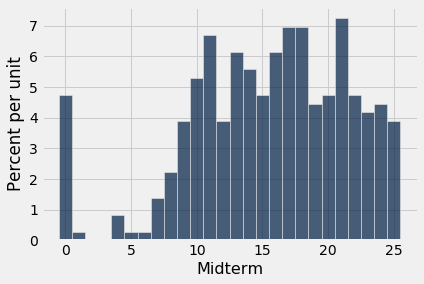

In [7]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-0.5, 25.6, 1))

In [8]:
percentile(85, scores_and_sections.column(1))


22

In [9]:
rank=np.ceil(0.85 * 359)
rank

306.0

In [10]:
sorted_scores = np.sort(scores_and_sections.column(1))
sorted_scores.item(305)

22

+ Quartile
 - 4분위값

> ### Bootstrap
---
+ 모집단으로부터 새로운 샘플을 구하는 것이 어려울 경우
+ 샘플로부터 다시 샘플링을 시도 
+ 2015년 샌프란시스코 공무원 보상 데이터를 이용해 개념을 알아보자.

In [12]:
sf2015 = Table.read_table('san_francisco_2015.csv')
sf2015

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


+ 우선 full-time 직원을 대상으로 하자.
+ 그리고 분석 필드는 'Total compensation'이다.

In [13]:
sf2015 = sf2015.where('Salaries', are.above(10000))
sf2015.num_rows


3715

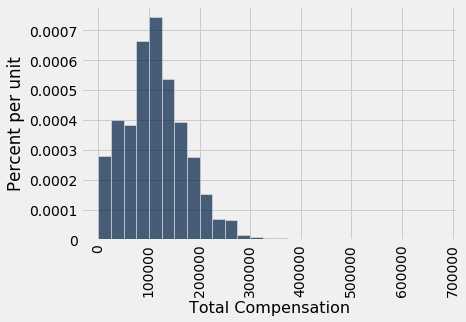

In [14]:
sf_bins = np.arange(0, 700000, 25000)
sf2015.select('Total Compensation').hist(bins=sf_bins)


+ 대부분 $30000 이하이지만 소수의 고소득자가 있다.
+ median을 구해보자.

In [15]:
pop_median = percentile(50, sf2015.column('Total Compensation'))
pop_median

109650.8

+ 만약 이러한 모집단 전체 데이터가 없어서 모집단의 median을 모른다고 해 보자.
+ 그리고 샘플데이터로부터 median을 추정해 보자.
+ 즉, 아래 셀과 같이 500명의 샘플 데이터만 알고 있다고 하자.

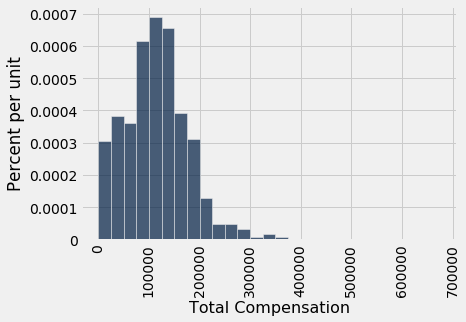

In [16]:
our_sample = sf2015.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [17]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

112155.95

+ 만약 우리가 다른 500명의 데이터를 가지고 있다면 다른 값으로 median으로 추정했을 것이다.
+ 이렇게 추정값이 달라질텐데 어떻게 추정해야 할까?
+ 이를 위해 Bootstrap 방법을 적용한다.

> The Bootstrap: Resampling from the Sample
---
1. Treat the original sample as if it were the population.

2. Draw from the sample, at random with replacement, the same number of times as the original sample size.


이렇게 샘플링을 반복하는 이유는 무엇인가?
- Law of averages : 충분히 큰 샘플링을 하면 샘플의 분포는 모집단의 분포와 유사해 진다.

샘플로부터 리샘플링을 통해 median을 구해보자.

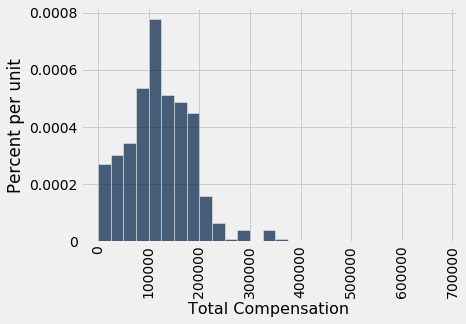

In [18]:
resample_1 = our_sample.sample()
resample_1.select('Total Compensation').hist(bins=sf_bins)


In [19]:
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1


117177.45

In [20]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

121119.43

+ 리샘플링을 반복함에 따라 다양한 median이 계산된다.
+ 반복 리샘플링을 통해 추정된 median의 분포를 구하는 함수를 구현해 보자.

In [0]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)
        
    return medians


+ 앞서 샘플데이터에 대해서 median 추정을 해 보자.
+ 그리고 실제 모집단의 median과도 비교해 보자.

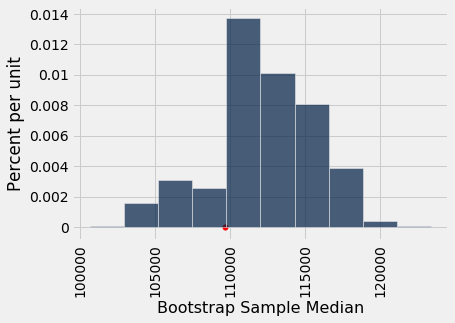

In [22]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000)
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()
plots.scatter(pop_median, 0, color='red', s=30);


+ 모집단의 median이 잘 추정되었는지 생각해 보자.
+ 예를 들어, 모집단의 median이 리샘플링된 median의 95% 구간 내에 포함되는가?

In [23]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)
(left, right)


(104115.34, 117439.29)

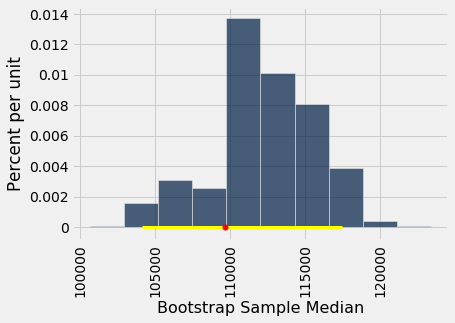

In [24]:
resampled_medians.hist()
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);


+ 95% 구간내 모집단 median이 잘 포함되었다.
+ 이것이 우연한 것인지를 살펴보기 위해 위 작업을 다시 100번 반복해 보자.

In [0]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals, in the table intervals

left_ends = make_array()
right_ends = make_array()

total_comps = sf2015.select('Total Compensation')

for i in np.arange(100):
    first_sample = total_comps.sample(500, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)   

In [26]:
intervals

Left,Right
103187,114150
108415,120098
101601,112418
107660,117177
102832,113743
99993.4,114497
107049,117177
103382,114562
100297,112294
95953.9,108015


+ 얼마나 자주 interval 속에 모집단 median이 포함되는지 확인해 보자.

In [27]:
intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows


97

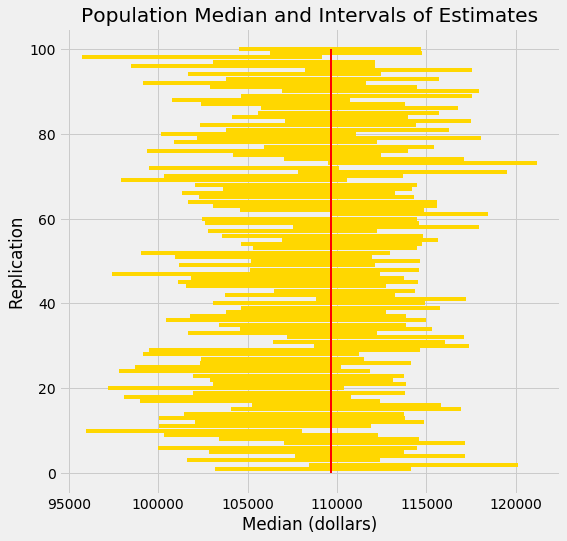

In [28]:
# HIDDEN 

replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.plot(make_array(pop_median, pop_median), make_array(0, 100), color='red', lw=2)
plots.xlabel('Median (dollars)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');


+ 만약 95%가 아닌 80%로 낮춘다면
 - interval의 길이가 짧아지고
 - 모집단 median이 포함될 가능성은 낮아진다.

> ### Confidence Intervals
---
+ 앞의 예제에서처럼
 - 계산된 interval을 ___95% confidence interval___ of a median 이라 부른다.
 - 이 때 95%를 ___confidence level___ of the interval 이라 한다.
+ 실제 상황에서는 모집단을 모르기 때문에
 - 얼마의 confidence level의 interval을 제시하게 된다.

+ 아기체중에 관한 데이터를 활용하자.
 - 임신기간과 아기체중의 비율에 대한 추정을 시도하자.

In [29]:
baby = Table.read_table('baby.csv')
baby

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


FileNotFoundError: ignored

In [0]:
ratios = baby.select('Birth Weight', 'Gestational Days').with_column(
    'Ratio BW/GD', baby.column('Birth Weight')/baby.column('Gestational Days')
)
ratios

In [0]:
ratios.select('Ratio BW/GD').hist()

+ 전체 모집단에 관한 median을 알지 못한다.
+ Bootstrap 방법을 통해 추정해 보자.

In [0]:
bstrap_medians = bootstrap_median(ratios, 'Ratio BW/GD', 5000)

In [0]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)
make_array(left, right)

In [0]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians
)
resampled_medians.hist(bins=15)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

+ 같은 방식으로 산모나이의 평균을 추정해 보자.

In [0]:
baby.select('Maternal Age').hist()

In [0]:
np.mean(baby.column('Maternal Age'))

In [0]:
def bootstrap_mean(original_sample, label, replications):
    
    """Returns an array of bootstrapped sample means:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    
    just_one_column = original_sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    return means

In [0]:
# Generate the means from 5000 bootstrap samples
bstrap_means = bootstrap_mean(baby, 'Maternal Age', 5000)

# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

In [0]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);


+ 왜 추정을 값이 아닌 interval로 하는가?
 - 위 예제에서 샘플의 평균값이 존재한다. 
 - 추정을 왜 단순히 그 값으로 하지 않는가?
+ 산모나이 분포는 종모양이 아님에도 Bootstrap 샘플 평균의 분포는 종모양에 가깝다. 



+ 80% Confidence interval을 구해보자.

In [0]:
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
make_array(left_80, right_80)

In [0]:
resampled_means.hist(bins=15)
plots.plot(make_array(left_80, right_80), make_array(0, 0), color='yellow', lw=8);


+ 95% confidence interval에 비해 짧다.
+ 만약 confidence level을 유지하면서 짧은 interval을 구하려면?
 - 샘플 크기가 커져야 한다.

> Confidence Interval for a Population Proportion: Bootstrap Percentile Method
---
+ 흡연 산모 비율을 추정해 보자.

In [0]:
smoking = baby.column('Maternal Smoker')
np.count_nonzero(smoking)/len(smoking)

In [0]:
def bootstrap_proportion(original_sample, label, replications):
    
    """Returns an array of bootstrapped sample proportions:
    original_sample: table containing the original sample
    label: label of column containing the Boolean variable
    replications: number of bootstrap samples
    """
    
    just_one_column = original_sample.select(label)
    proportions = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resample_array = bootstrap_sample.column(0)
        resampled_proportion = np.count_nonzero(resample_array)/len(resample_array)
        proportions = np.append(proportions, resampled_proportion)
        
    return proportions


In [0]:
# Generate the proportions from 5000 bootstrap samples
bstrap_props = bootstrap_proportion(baby, 'Maternal Smoker', 5000)

# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_props)
right = percentile(97.5, bstrap_props)

make_array(left, right)

In [0]:
resampled_proportions = Table().with_column(
    'Bootstrap Sample Proportion', bstrap_props
)
resampled_proportions.hist(bins=15)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);


+ Bootstrap 방법의 주의점
 - 샘플의 크기가 충분히 커야 한다 : The law of averages
 - 리샘플링 횟수도 충분히 커야 한다.
 - 평균/중간값 추정은 합리적이지만, 최소값/최대값 추정은 적절하지 않다.
 

+ 가설 검증보다 많은 정보를 알려준다.


+ 다음 Hodgkin병에 관한 데이터를 사용해 보자.
 - Height in cm
 - A measure of radiation to the mantle (neck, chest, under arms) 
 - A measure of chemotherapy
 - A score of the health of the lungs at baseline, that is, at the start of the treatment; higher scores correspond to more healthy lungs
 - The same score of the health of the lungs, 15 months after treatment


In [0]:
hodgkins = Table.read_table('hodgkins.csv')
hodgkins

In [0]:
hodgkins = hodgkins.with_column(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)
hodgkins

In [0]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

다음을 테스트해 보자. (1% cutoff for the P-value)

__Null hypothesis.__ In the population, the average drop is 0.



__Alternative hypothesis.__ In the population, the average drop is not 0.


In [0]:
bstrap_means = bootstrap_mean(hodgkins, 'drop', 10000)

left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

In [0]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

+ Null hypothesis는 reject된다.
+ 단순히 그런 가설을 테스트하는 것보다 interval을 제시하는 것이 더 좋은 정보이다.
+ confidence level이 높고 샘플 크기가 작아서 interval의 길이가 길다.

> ### Recap
---

+ Percentile
 - $p$ percentile 의 의미
 - percentile() 함수
+ Bootstrap
 - 샘플로부터 다시 샘플링하기
+ Confidence interval
 - confidence level